<font size="5">Objective 1: Data Preparation and QA</font>

In [5]:
import pandas as pd
listings= pd.read_csv(r"D:\Portfolio Projects\Python\Airbnb+Data\Airbnb Data\listings.csv", encoding= "ISO-8859-1", low_memory= False)

In [7]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [13]:
listings['host_since']= pd.to_datetime(listings['host_since'])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

changing the 'object' dtype of 'host_since' to 'datetime' format by type casting.

In [32]:
paris_listings= (listings.query("city == 'Paris'").loc[:, ["host_since","neighbourhood","city","accommodates","price"]])
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


Choosing only those coloumns out of 33, which we need for our analysis.Moreover, we got to know about the missing values in the "host_since" coloumn (64657 instead of 64690).

In [37]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [43]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [47]:
paris_listings.query("price== 0 and accommodates== 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

Since, the missing values are minuscule with respect to the volume of our dataset, we are going to ignore it.


<font size="5">Objective 2: Prepare for Visualization</font>


In [63]:
paris_listings_neighbourhood = (
    paris_listings.groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


The 5 Most economical listing in Paris are above.

In [65]:
paris_listings_neighbourhood = (
    paris_listings.groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


The most expensive listing in Paris is Elysee.

In [75]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [81]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [85]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


<font size="5">Objective 3: Visualize the Data </font>

In [88]:
# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

# Importing Plotly for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

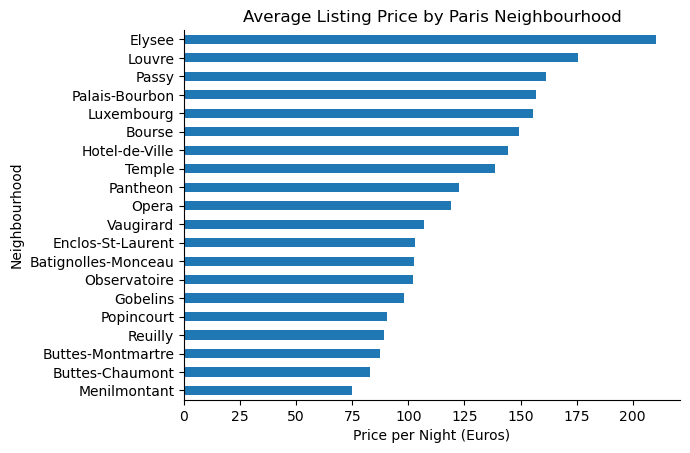

In [96]:
(paris_listings_neighbourhood
 .plot
 .barh(
     title ="Average Listing Price by Paris Neighbourhood",
     xlabel="Price per Night (Euros)",
     ylabel="Neighbourhood",
     legend= None
 )
)

sns.despine()

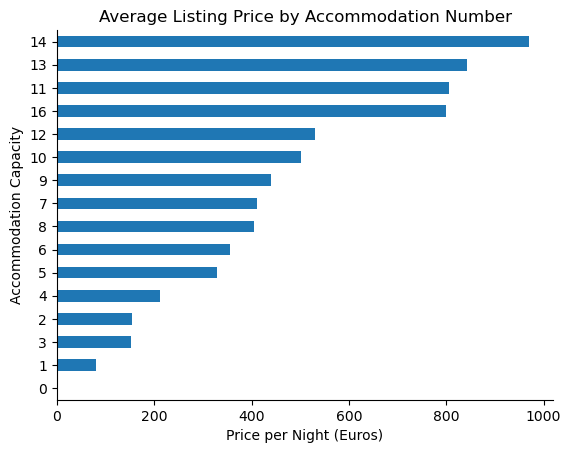

In [100]:
(paris_listings_accommodates
 .plot
 .barh(
     title ="Average Listing Price by Accommodation Number",
     xlabel="Price per Night (Euros)",
     ylabel="Accommodation Capacity",
     legend= None
 )
)

sns.despine()

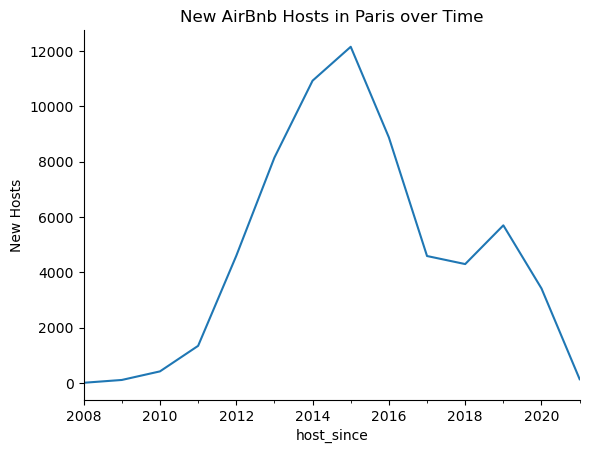

In [104]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel= "New Hosts",
    title= "New AirBnb Hosts in Paris over Time"
)
sns.despine()

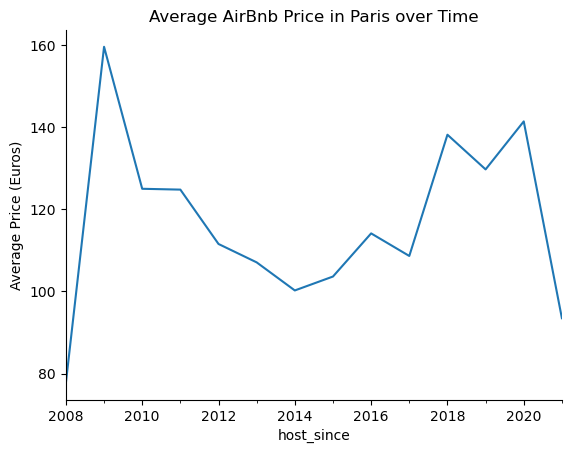

In [106]:
paris_listings_over_time["price"].plot(
    ylabel= "Average Price (Euros)",
    title= "Average AirBnb Price in Paris over Time"
)
sns.despine()

Text(0.5, 1.0, '2015 Regualations lead to Fewer Hosts and Higher Prices.')

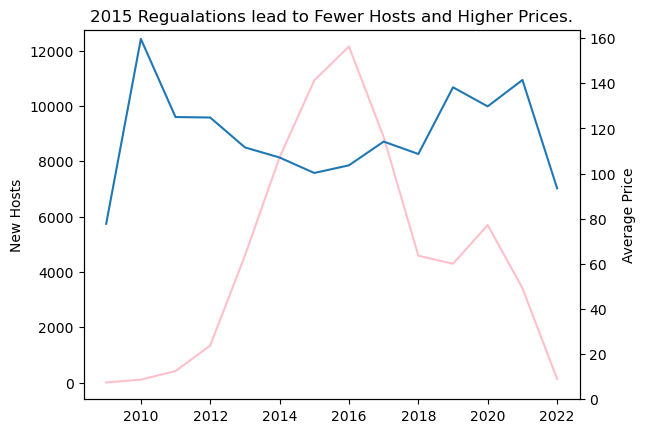

In [122]:
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label= "New Hosts",
    c= "pink"
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label= "Average Price",
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("2015 Regualations lead to Fewer Hosts and Higher Prices.")